##### duration: 10 minutes takes ~ 45 minutes on o2

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
import logging
logging.basicConfig(level=logging.INFO)
print(sys.executable)

/n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3


### Get recording info (google sheets)

In [3]:
import requests
import pandas as pd
from io import BytesIO

INFO:numexpr.utils:Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [4]:
# spreadsheet_url = 'https://docs.google.com/spreadsheet/ccc?key=14HIqUaSl_n-91hpAvmACY_iVY9nLKdlA6qklhxfZon0&output=csv&gid=0'
spreadsheet_url = "https://docs.google.com/spreadsheet/ccc?key=1jACsUmxuJ9Une59qmvzZGc1qXezKhKzD1zho2sEfcrU&output=csv&gid=0"
response = requests.get(spreadsheet_url)
recording_df = pd.read_csv(BytesIO(response.content))

In [5]:
recording_df[:3]

,Subject,duration_m,video_recording_id,ephys_id,calibration_id,calibration_board_shape,calibration_square_size,video_location_on_o2,ephys_location_on_o2,calibration_location_on_o2,samplerate
0,M04002,10,24-05-01-13-26-43-110846,2024-05-01_13-26-37,24-05-01-13-45-07-825493,NaN,NaN,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,/n/groups/datta/tim_sainburg/datasets/chronic2...,150


### Run

In [6]:
for idx, recording_row in recording_df.iterrows():
    break

In [7]:
output_directory = Path("/n/groups/datta/tim_sainburg/datasets/scratch/") / "240806-3d-pipeline"

In [8]:
output_directory

PosixPath('/n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline')

In [9]:
output_directory_gimbal = output_directory / 'gimbal' / recording_row.video_recording_id
output_directory_gimbal.mkdir(parents=True, exist_ok=True)

In [10]:
from multicamera_airflow_pipeline.tim_240731.keypoints.inference_gimbal import GimbalInferencer 

/n/groups/datta/tim_sainburg/projects/multicamera_airflow_pipeline/multicamera_airflow_pipeline/tim_240731/keypoints/inference_gimbal.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
I0000 00:00:1723041198.752517  163124 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.inference_gimbal:Python interpreter binary location: /n/groups/datta/tim_sainburg/conda_envs/kpms/bin/python3
INFO:multicamera_airflow_pipeline.tim_240731.keypoints.inference_gimbal:Python version: 3.10.

In [11]:
!ls {output_directory}

2D_predictions	    camera_sync		  gimbal	      spikesorting
arena_alignment     continuous_features   openephys_sync      triangulation
camera_calibration  egocentric_alignment  size_normalization


In [ ]:
help(GimbalInferencer)

In [22]:
gimbal_inferencer = GimbalInferencer(
    gimbal_output_directory=output_directory_gimbal,
    calibration_folder=(
        output_directory
        / "camera_calibration"
        / recording_row.calibration_id
        / "jarvis"
        / "CalibrationParameters"
    ),
    predictions_3d_directory=(
        output_directory / "triangulation" / recording_row.video_recording_id
    ),
    recompute_completed=True,
    n_initialization_epochs = 50,
    num_iters_inference = 100,
    testing=False,
    step_size=0.1,
)

prepopulating output:   0%|          | 0/1 [00:00<?, ?it/s]

batch:   0%|          | 0/1 [00:00<?, ?it/s]

inference:   0%|          | 0/100 [00:00<?, ?it/s]

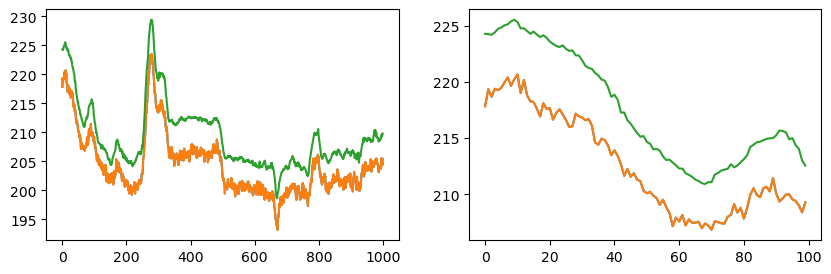

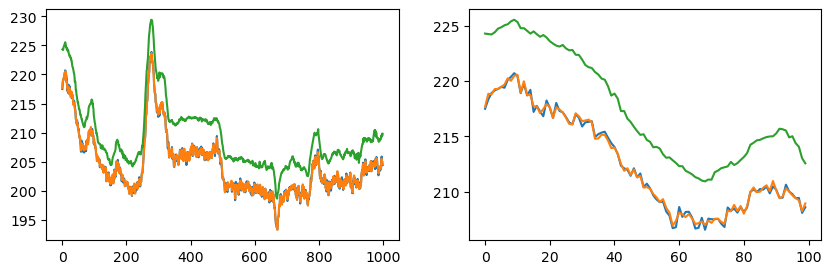

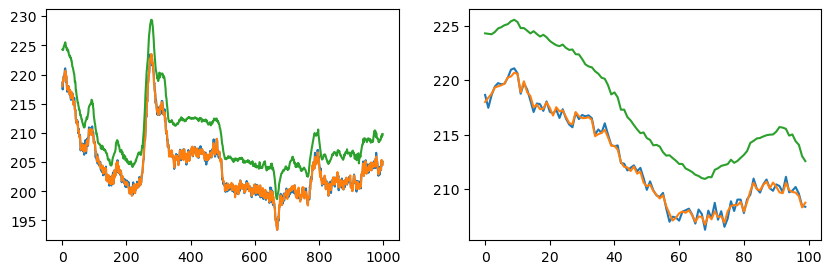

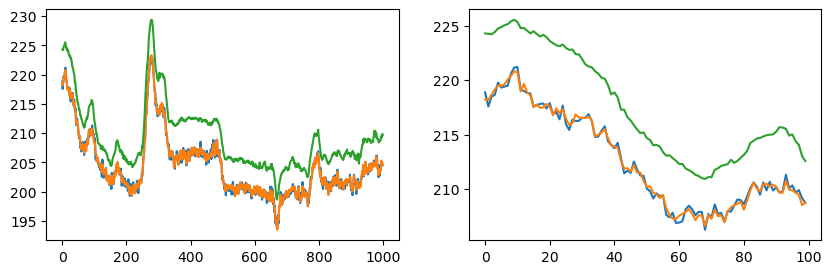

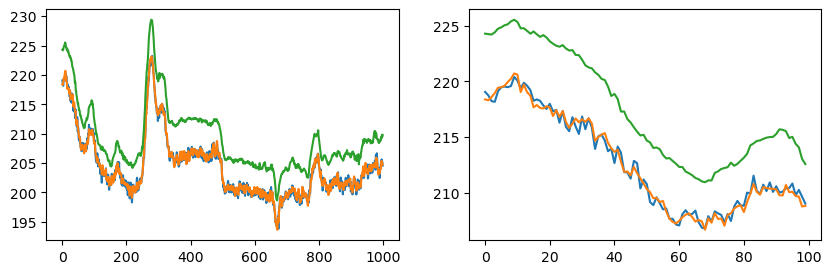

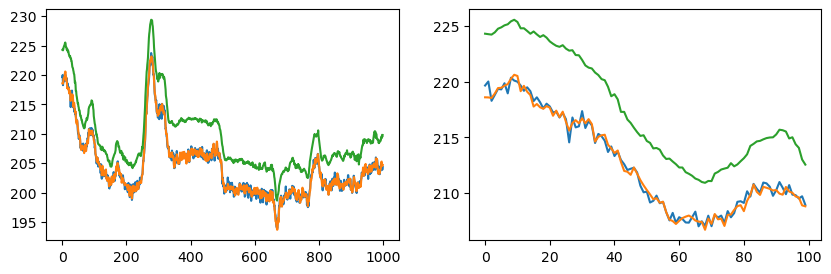

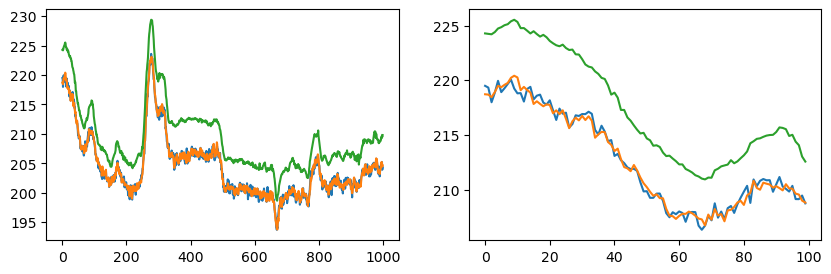

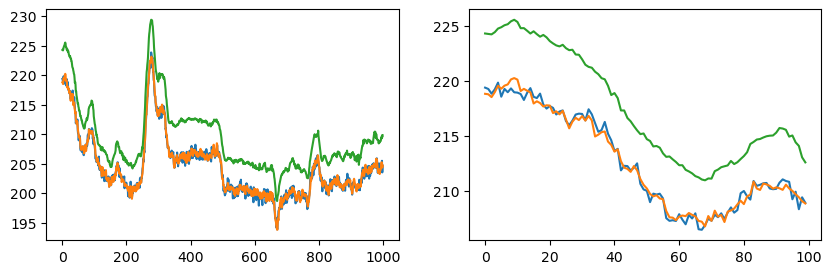

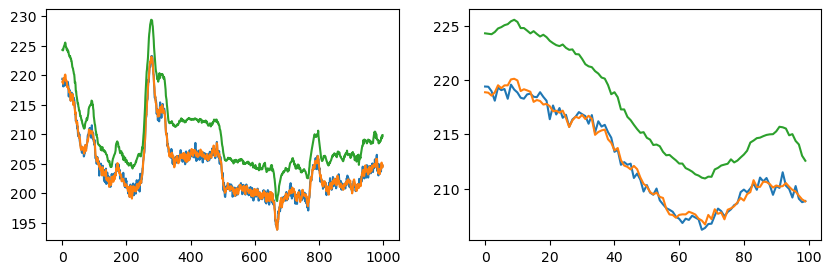

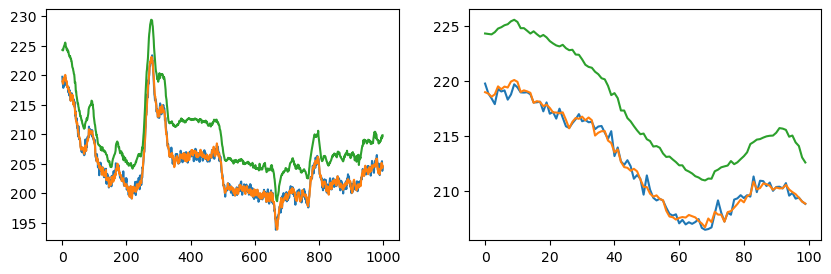

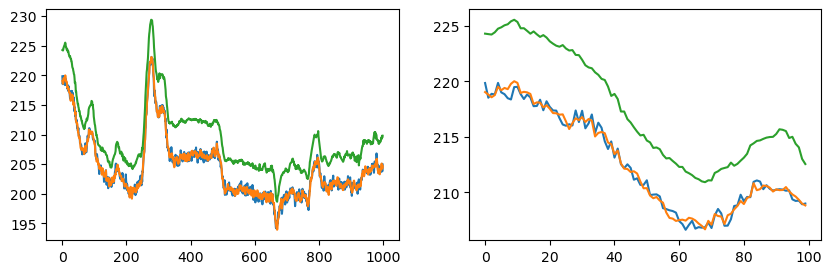

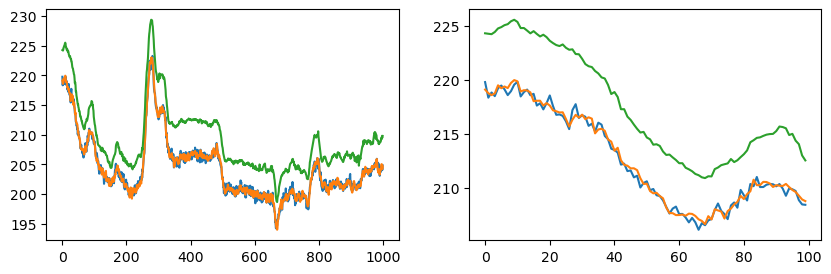

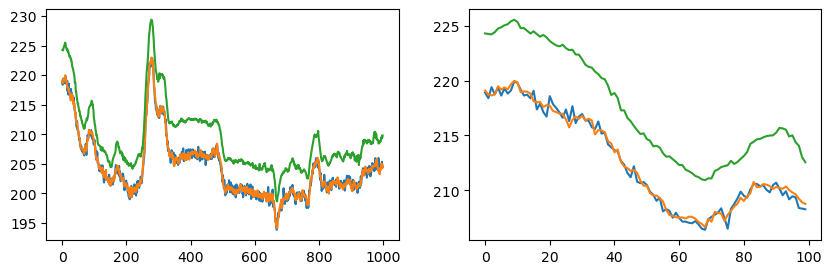

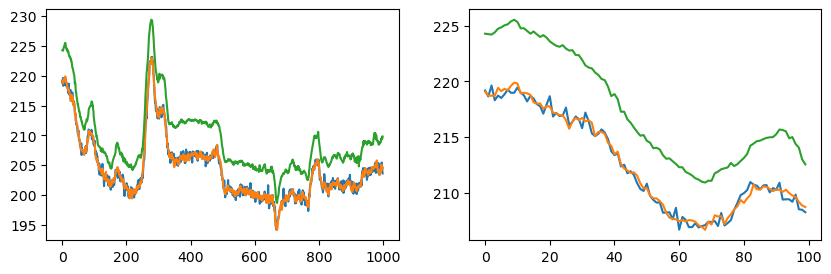

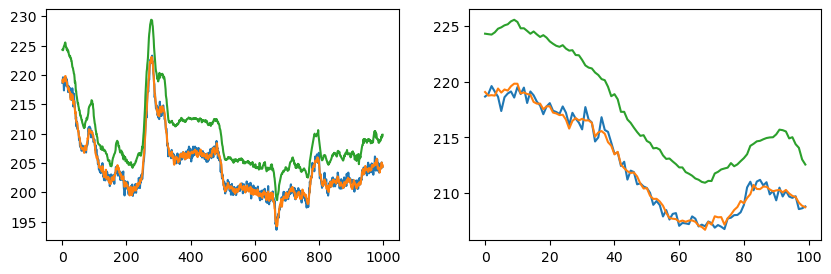

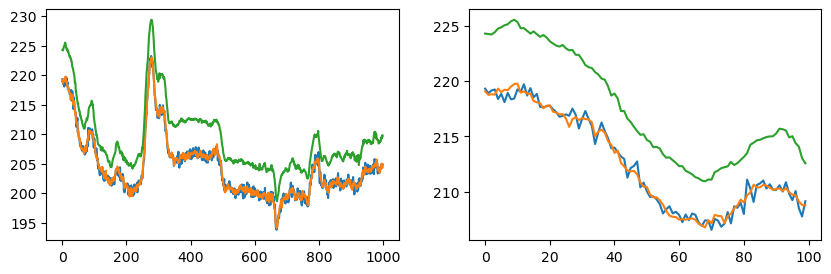

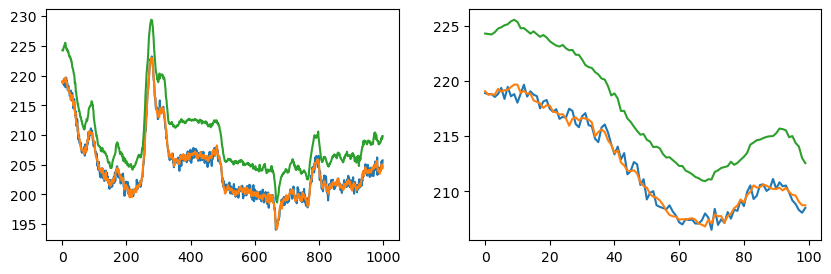

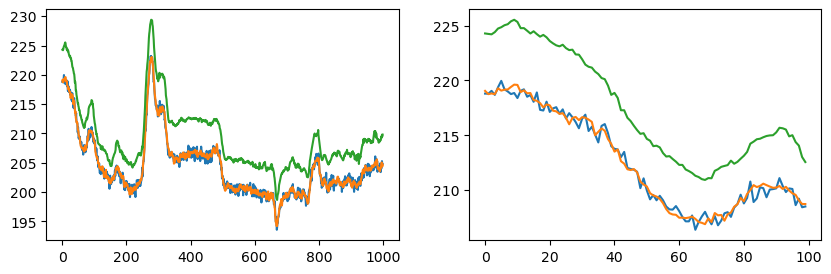

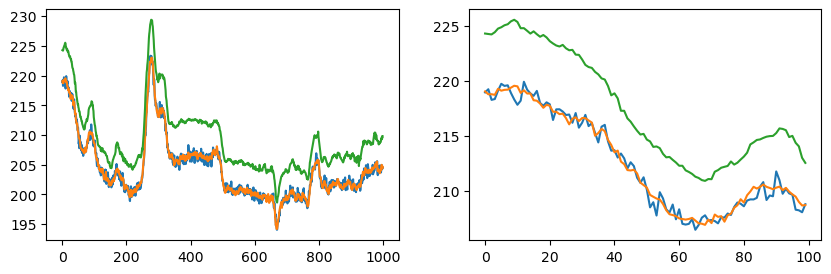

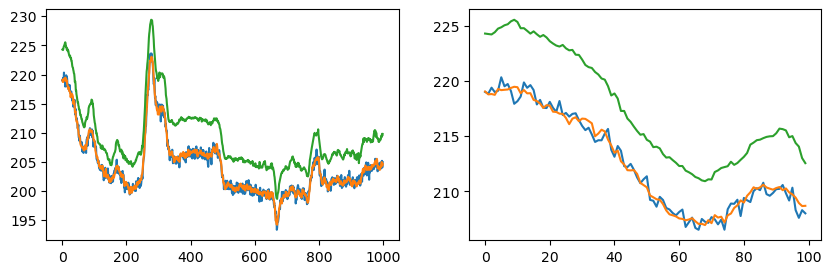

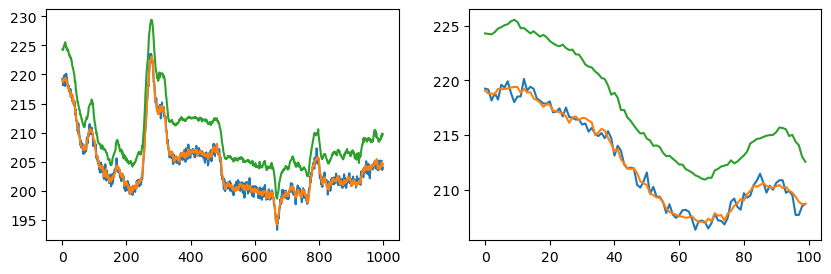

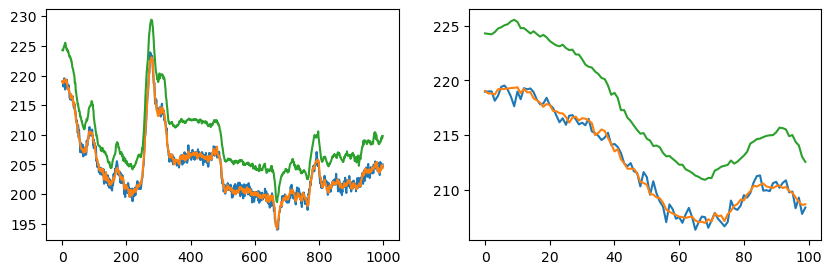

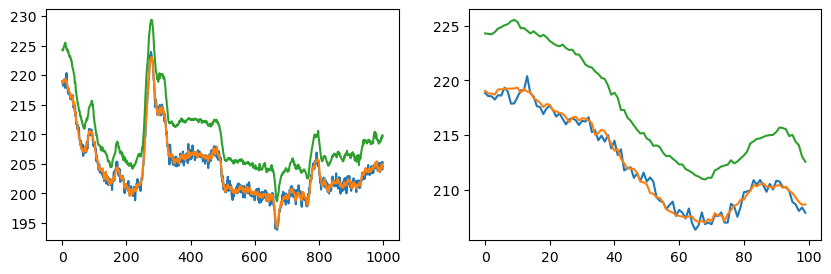

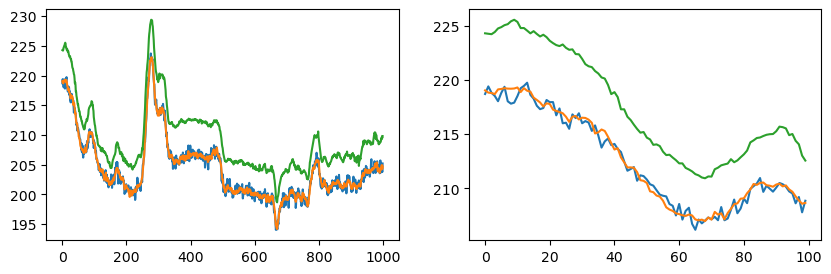

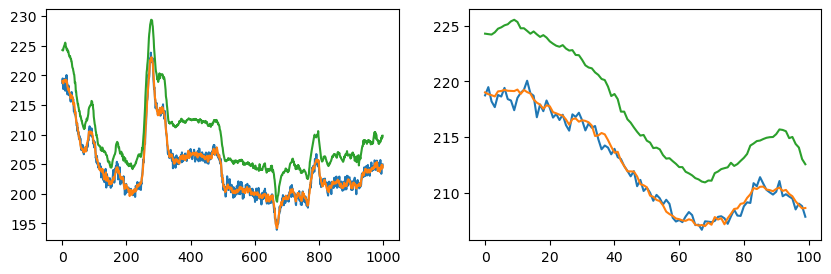

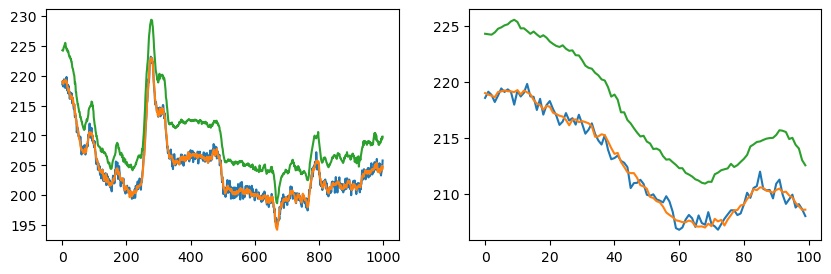

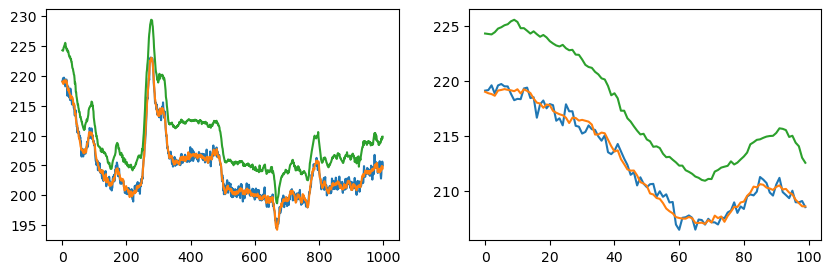

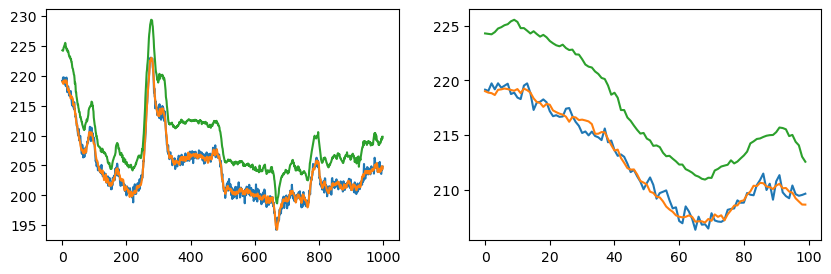

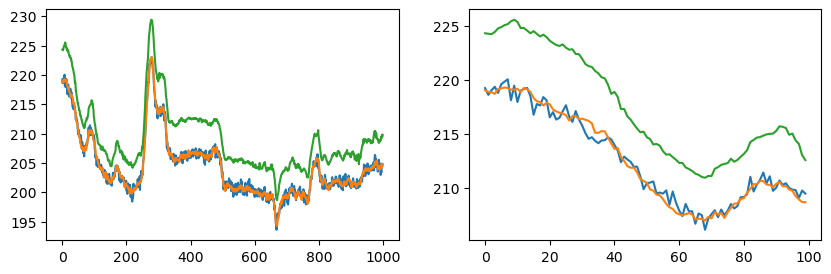

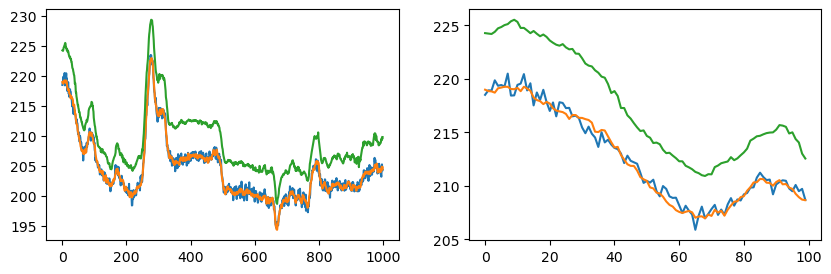

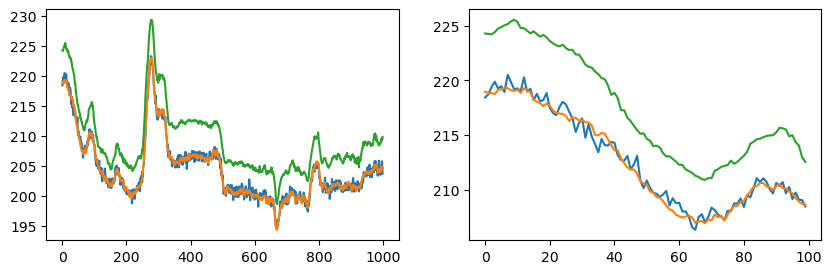

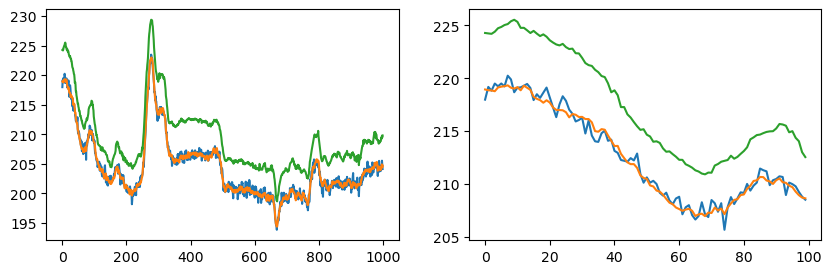

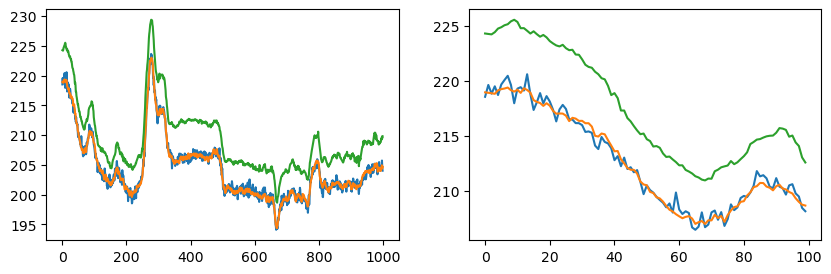

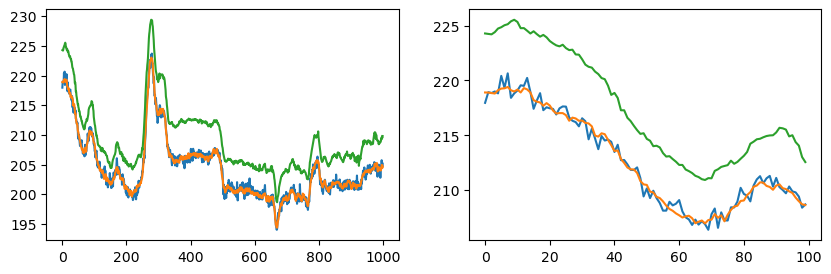

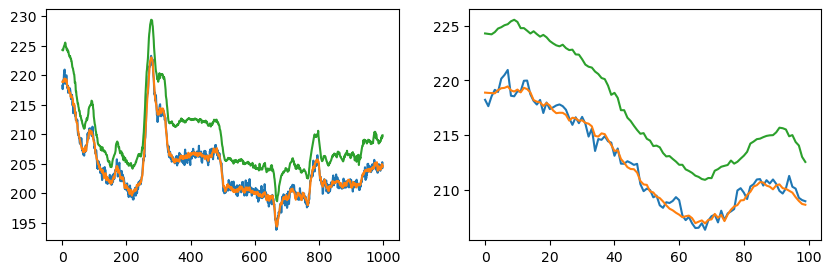

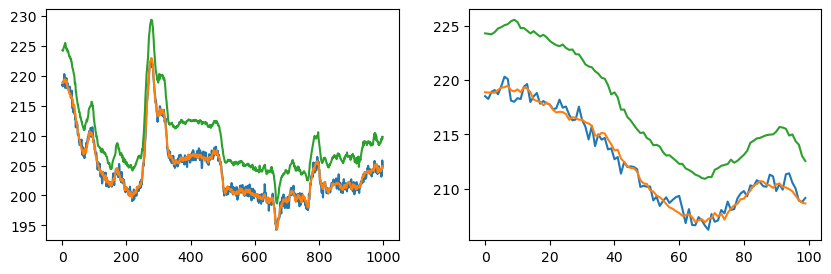

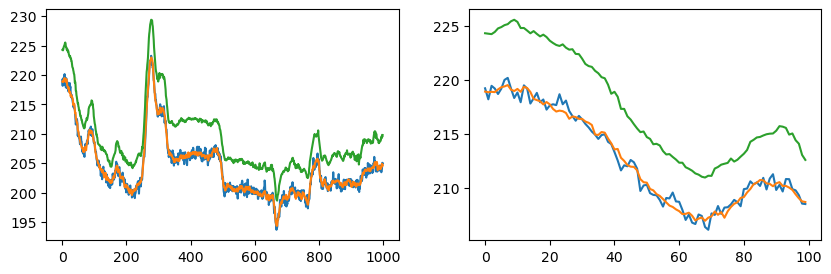

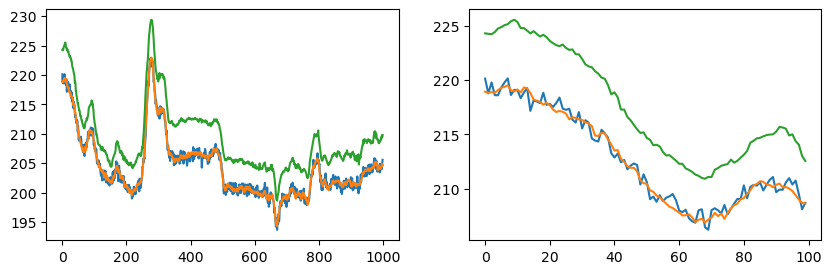

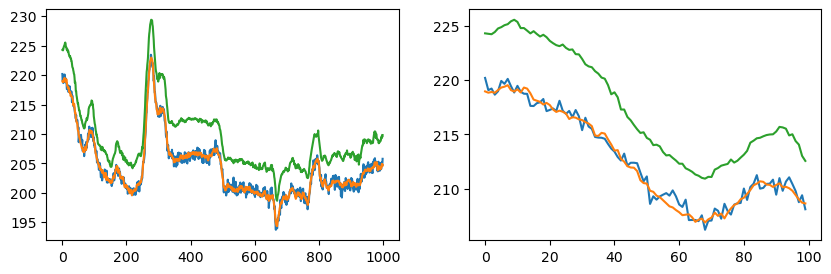

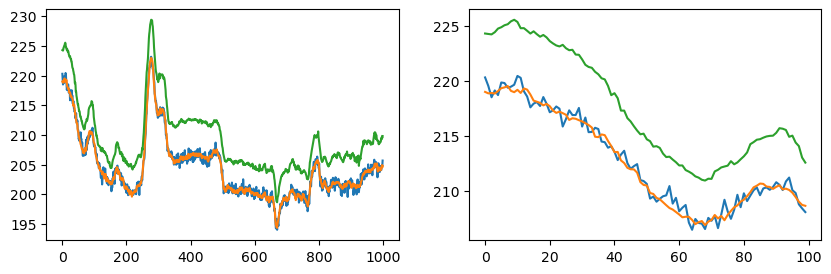

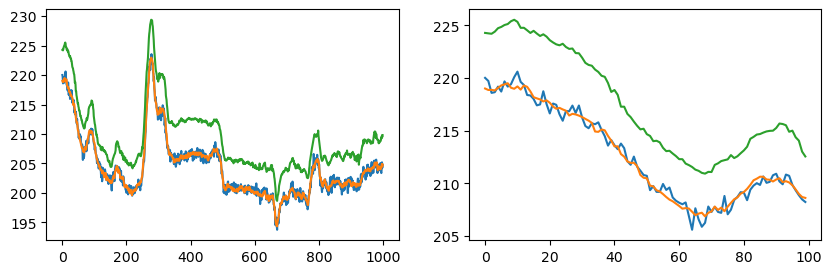

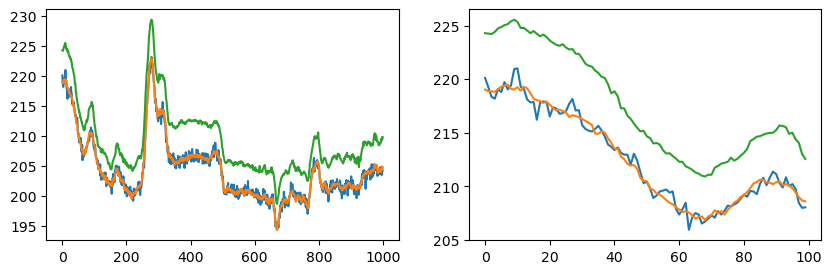

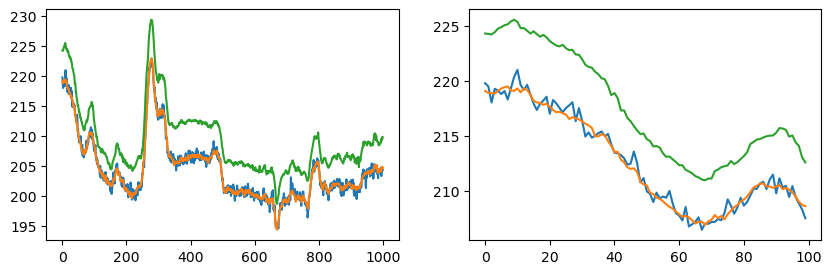

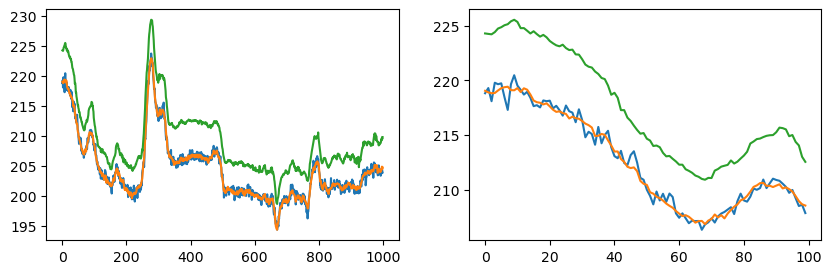

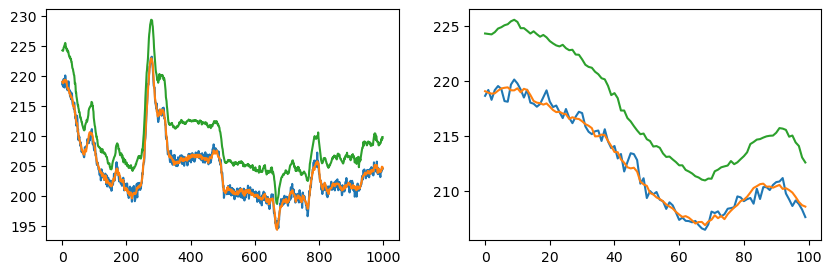

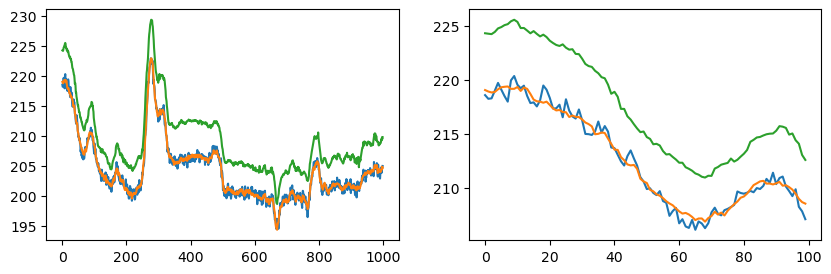

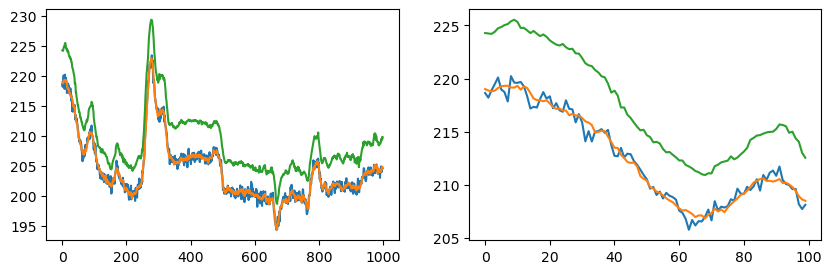

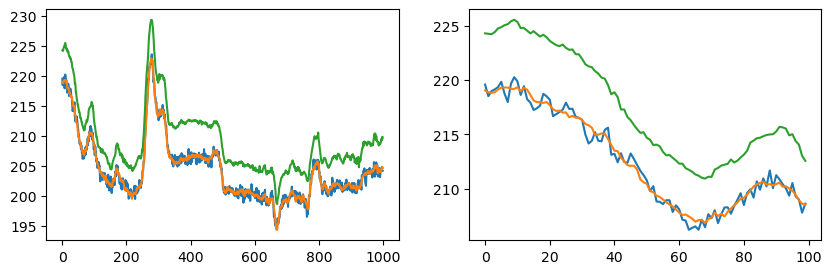

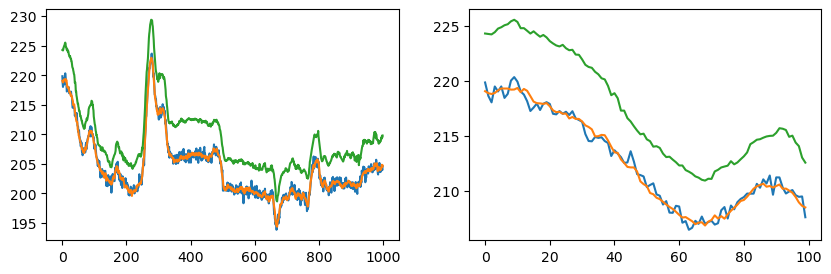

In [23]:
gimbal_inferencer.run()

In [ ]:
!ls {output_directory_gimbal}

In [24]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [25]:
import numpy as np
def load_memmap_from_filename(filename):
    # Extract the metadata from the filename
    parts = filename.name.rsplit('.', 4)  # Split the filename into parts
    dtype_str = parts[-3]  # Get the dtype part of the filename
    shape_str = parts[-2]  # Get the shape part of the filename
    shape = tuple(map(int, shape_str.split('x')))  # Convert shape string to a tuple of integers
    # Load the array using numpy memmap
    array = np.memmap(filename, dtype=dtype_str, mode='r', shape=shape)
    return array

In [26]:
gimbal_mmap_file = output_directory_gimbal / "gimbal.float32.90009x25x3.mmap"

In [27]:
gimbal_mmap = load_memmap_from_filename(gimbal_mmap_file)

In [28]:
gimbal_success_mmap_file = output_directory_gimbal / "gimbal_success.bool.90009x1.mmap"
gimbal_success_mmap = load_memmap_from_filename(gimbal_success_mmap_file)

In [29]:
triangulation_mmap_file = output_directory / "triangulation" / recording_row.video_recording_id / "predictions_3d.float32.90009x25x3.mmap"

In [30]:
triangulation_mmap = load_memmap_from_filename(triangulation_mmap_file)

In [31]:
triangulation_mmap.shape

(90009, 25, 3)

In [32]:
import matplotlib.pyplot as plt

In [ ]:
breakme
debugging

In [ ]:
import joblib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
#params_bad = joblib.load("/n/groups/datta/tim_sainburg/datasets/scratch/240806-3d-pipeline/gimbal/24-05-01-13-26-43-110846/gimbal_params.p")

In [ ]:
#params_bad.keys()

In [ ]:
#params_good = joblib.load(Path('/n/groups/datta/tim_sainburg/projects/24-04-22-neuropixels-recordings/data/keypoints/mmpose-predictions/M04002/gimbal_params.p'))

In [ ]:
#for key in params_bad.keys():
#    print(key, type(params_bad[key]), type(params_good[key]))
#    if type(params_bad[key]) == np.ndarray:
#        print(f"\t{params_bad[key].shape}")

In [ ]:
#params_bad['indices_egocentric'], params_good['indices_egocentric']
#fig, axs = plt.subplots(nrows=2, figsize=(10,4))
#axs[0].plot(params_bad["obs_inlier_variance"].T);
#axs[1].plot(params_good["obs_inlier_variance"].T);
#np.all(params_bad['parents'] == params_good['parents'])
#fig, ax = plt.subplots(figsize=(5,1))
#ax.plot(params_bad['radii'])
#ax.plot(params_good['radii'])
#fig, ax = plt.subplots(figsize=(5,1))
#ax.plot(params_bad['radii_std'])
#ax.plot(params_good['radii_std'])
#fig, axs = plt.subplots(nrows=3, figsize=(10,4))
#axs[0].hist(params_bad['mus'].flatten())
#axs[1].hist(params_good['mus'].flatten())
#axs[2].hist(params_good['mus'].flatten()- params_bad['mus'].flatten())
#fig, ax = plt.subplots(figsize=(5,1))
#ax.plot(params_bad['pis']);
#ax.plot(params_good['pis']);

In [ ]:
fig, axs = plt.subplots(nrows=3, figsize=(10,4))
axs[0].plot(params_bad['kappas']);
axs[1].plot(params_good['kappas']);
axs[2].plot(params_bad['kappas'] - params_good['kappas']);

In [ ]:
key

In [ ]:
#%debug